In [1]:
# This notebook is for testing the rotation module in Class_rot, modified by Hongbo Cai, debugged with Yilun Guan

In [2]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
from math import pi
mpl.rcParams['font.size']=13.5

In [3]:
# for the rotated CMB power spectra rotated by a scale-invariant rotation field, two paramters are needed:
# the isotropic cosmic rotation angle
alpha = 0.1 
# The amplitude of the cosmic rotation power spectrum
A_cb = 10

In [4]:
# maximum multipole
ellmax = 3000
# tensor-to-scalar ratio
r = 0.1
# average CMB temperature
Tcmb = 2.72e6
# minmum multipole for output
ellmin = 2

In [5]:
# define the parameters dict
params = {
        'output': 'tCl,pCl,rCl',
        'l_max_scalars': ellmax,
        'modes':'s,t',
        'r':r,
        'rotation': 'yes',
        'alpha': alpha,
        'A_cb': A_cb}

# Create an instance of the CLASS wrapper
cosmo = Class()
# Set the parameters to the cosmological code
cosmo.set(params)
# Set the computation level and compute 
cosmo.compute(level=['rotation'])
# Get rotated Cl
rot_cls = cosmo.rotated_cl()

Text(0.5, 1.0, '$\\bar{\\alpha}=0.1^{\\circ}$')

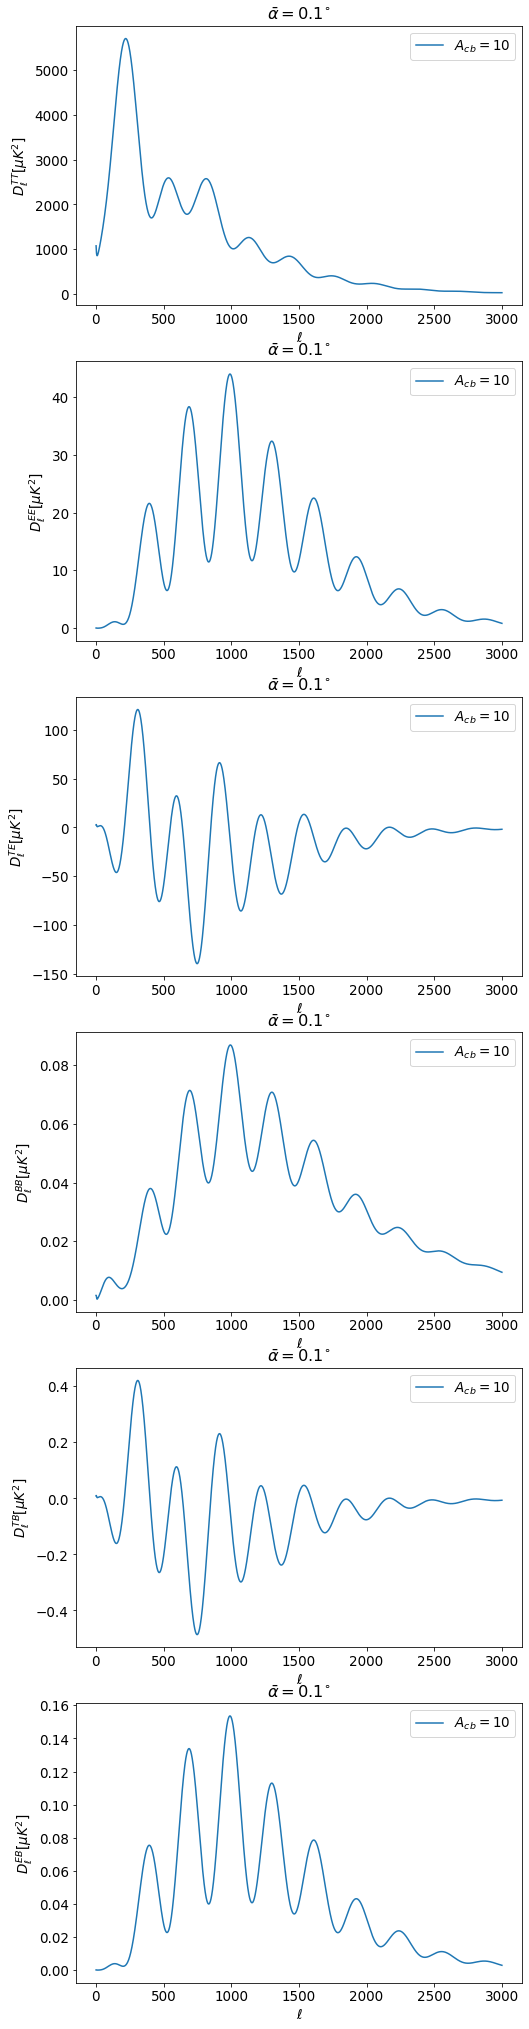

In [7]:
ells = rot_cls['ell']
factor = ells*(ells+1)/(2*pi)

fig, ax = plt.subplots(6, 1,figsize=(8*1,6*6))

ax[0].plot(ells[ellmin:], Tcmb**2*(factor*rot_cls['tt'])[ellmin:], label=r'$A_{cb}=%s$' %A_cb)
ax[0].set_xlabel(r'$\ell$')
ax[0].set_ylabel(r'$D^{TT}_{\ell}[\mu K^2]$')
ax[0].legend()
ax[0].set_title(r'$\bar{\alpha}=%s^{\circ}$' %alpha)

ax[1].plot(ells[ellmin:], Tcmb**2*(factor*rot_cls['ee'])[ellmin:], label=r'$A_{cb}=%s$' %A_cb)
ax[1].set_xlabel(r'$\ell$')
ax[1].set_ylabel(r'$D^{EE}_{\ell}[\mu K^2]$')
ax[1].legend()
ax[1].set_title(r'$\bar{\alpha}=%s^{\circ}$' %alpha)

ax[2].plot(ells[ellmin:], Tcmb**2*(factor*rot_cls['te'])[ellmin:], label=r'$A_{cb}=%s$' %A_cb)
ax[2].set_xlabel(r'$\ell$')
ax[2].set_ylabel(r'$D^{TE}_{\ell}[\mu K^2]$')
ax[2].legend()
ax[2].set_title(r'$\bar{\alpha}=%s^{\circ}$' %alpha)

ax[3].plot(ells[ellmin:], Tcmb**2*(factor*rot_cls['bb'])[ellmin:], label=r'$A_{cb}=%s$' %A_cb)
ax[3].set_xlabel(r'$\ell$')
ax[3].set_ylabel(r'$D^{BB}_{\ell}[\mu K^2]$')
ax[3].legend()
ax[3].set_title(r'$\bar{\alpha}=%s^{\circ}$' %alpha)

ax[4].plot(ells[ellmin:], Tcmb**2*(factor*rot_cls['tb'])[ellmin:], label=r'$A_{cb}=%s$' %A_cb)
ax[4].set_xlabel(r'$\ell$')
ax[4].set_ylabel(r'$D^{TB}_{\ell}[\mu K^2]$')
ax[4].legend()
ax[4].set_title(r'$\bar{\alpha}=%s^{\circ}$' %alpha)

ax[5].plot(ells[ellmin:], Tcmb**2*(factor*rot_cls['eb'])[ellmin:], label=r'$A_{cb}=%s$' %A_cb)
ax[5].set_xlabel(r'$\ell$')
ax[5].set_ylabel(r'$D^{EB}_{\ell}[\mu K^2]$')
ax[5].legend()
ax[5].set_title(r'$\bar{\alpha}=%s^{\circ}$' %alpha)